## EDA

In [ ]:
!pip install psycopg2-binary

In [101]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import helper_db as db


In [102]:
print(db.connect_to_db())

<cursor object at 0x7f7df25cb8b0; closed: 0>


### Question 1: For a given city/country, what is the trend of their average temperature?

In [103]:
cursor = db.connect_to_db()

In [104]:
cursor.execute("SELECT * FROM import.globaltemperaturesbycountry;")

In [105]:
# for i in cursor.fetchall():
#     print(i)

df_country_0 = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [106]:
df_country = df_country_0.copy()
df_country['country'] = df_country['country'].str.strip()
df_country.sample(10)

,dt,averagetemperature,averagetemperatureuncertainty,country
568848,1987-12-01,26.357,0.276,Virgin Islands
26436,1936-03-01,18.723,0.268,Argentina
197206,1894-11-01,16.023,1.394,Gaza Strip
345545,1887-06-01,16.794,0.265,Monaco
540929,1995-02-01,25.211,0.345,Turks And Caicas Islands
130052,1929-01-01,23.732,0.411,Cuba
156189,1907-01-01,22.953000000000007,1.27,El Salvador
286938,2004-08-01,16.125,0.239,Kyrgyzstan
486835,1884-06-01,,,South Georgia And The South Sandwich Isla
559199,1946-11-01,20.642,0.404,Uruguay


<AxesSubplot:title={'center':'Average Temperature of Afghanistan (by year)'}, xlabel='year'>

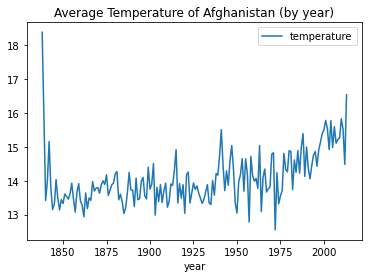

In [107]:
country = 'Afghanistan'
df_country = df_country[df_country['country'] == country].sort_values(by=['dt'], ascending=True)
df_country = df_country.replace(to_replace='', value = np.nan,regex=True)
df_country = df_country.dropna()
df_country['year'] = df_country['dt'].str[:4].astype(int)
df_country['averagetemperature'] = df_country['averagetemperature'].astype(float)
df_country['temperature'] = df_country.groupby('year')['averagetemperature'].transform('mean')
df_country.drop_duplicates(
    subset=["year"], keep="first"
).plot(
    x="year", y="temperature", kind="line", title="Average Temperature of " + country + ' (by year)'
)

<AxesSubplot:title={'center':'Average Temperature of Europe (by year)'}, xlabel='year'>

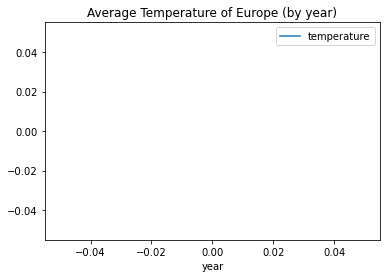

In [108]:
country = 'Europe'
df_country = df_country[df_country['country'] == country].sort_values(by=['dt'], ascending=True)
df_country = df_country.replace(to_replace='', value = np.nan,regex=True)
df_country = df_country.dropna()
df_country['year'] = df_country['dt'].str[:4].astype(int)
df_country['averagetemperature'] = df_country['averagetemperature'].astype(float)
df_country['temperature'] = df_country.groupby('year')['averagetemperature'].transform('mean')
df_country.drop_duplicates(
    subset=["year"], keep="first"
).plot(
    x="year", y="temperature", kind="line", title="Average Temperature of " + country + ' (by year)'
)

<AxesSubplot:title={'center':'Average Temperature of India (by year)'}, xlabel='year'>

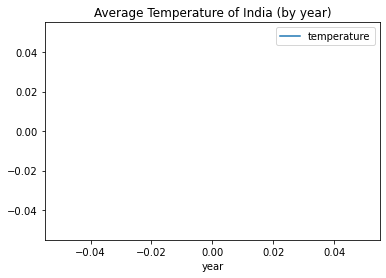

In [109]:
country = 'India'
df_country = df_country[df_country['country'] == country].sort_values(by=['dt'], ascending=True)
df_country = df_country.replace(to_replace='', value = np.nan,regex=True)
df_country = df_country.dropna()
df_country['year'] = df_country['dt'].str[:4].astype(int)
df_country['averagetemperature'] = df_country['averagetemperature'].astype(float)
df_country['temperature'] = df_country.groupby('year')['averagetemperature'].transform('mean')
df_country.drop_duplicates(
    subset=["year"], keep="first"
).plot(
    x="year", y="temperature", kind="line", title="Average Temperature of " + country + ' (by year)'
)

### Question 2: For a given year and a given city/country, what is the max/min temperature?

### Question 3: For a given year, which city/country has the highest/lowest temperature on average?

### Question 4: For a given city/country, what is the initial and the most recent temperature?